# Global Imports


In [ ]:
!pip -q install mysql-connector-python

import mysql.connector
import random
import pandas as pd
import numpy as np
from itertools import combinations, product
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import warnings
import matplotlib.gridspec as gridspec

sns.set(style="ticks")

warnings.filterwarnings("ignore")
import math
import collections

import bisect

import ast
import datetime
import itertools
import json
from multiprocessing import Pool
from functools import partial


     |████████████████████████████████| 25.4MB 123kB/s 


In [ ]:
import sys
!rm -rf '/content/clustering/'
!git clone https://github.com/ryanapfel/clustering.git
sys.path.append('/content/clustering/src')
sys.path.append('/content/clustering')


Cloning into 'clustering'...
remote: Enumerating objects: 233, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 233 (delta 117), reused 176 (delta 60), pack-reused 0
Receiving objects: 100% (233/233), 53.59 KiB | 8.93 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [ ]:
from data import Content, Titles, DB, Meta
from filtering import SceneHeuristic
from utils import Cluster, CorrelationStructure, CStruct, Scenes, User, Users
from models import K_Mean
from scoring import Scores

# Clustering

### Retrieval

In [ ]:
connector = {"host": "fz9143r8weo16tpq.cbetxkdyhwsb.us-east-1.rds.amazonaws.com",
              "user":"rasmfoasf23a",
              "password":"Ej!jcaiwbd1bd#7G391cadF" }

titles = Titles(connector, 'movie', topScenes=6)

In [ ]:
db = DB(connector['host'],connector['user'],connector['password'])

In [ ]:
titles.getResponses()


In [ ]:
df = titles.getDataFrame()
print(df.shape)
df.head()

error 1 error 2 error 3 error 4 5 error 6 7 error 8 9 error 10 error 11 error 12 error 13 error 14 error 15 error 16 error 17 18 19 error 83 error 84 error 85 error 86 error 99 error 100 101 error 102 error 103 error 104 error 105 error 106 107 error 108 error 109 116 122 error 123 error 124 error 125 error 126 error 127 128 error 129 error 132 error 133 error 134 error 135 136 137 error 138 139 error 140 error 170 172 173 error 174 175 error 176 177 error 178 error 179 error 181 error 182 error 183 error 184 error 185 error 186 187 error 188 error 189 190 191 error 192 error 193 error 194 195 196 error 197 198 error 199 200 error 201 203 205 206 error 207 error 209 error 210 211 error 212 error 213 error 215 error 216 error 217 error 218 223 error 224 225 error 226 error 247 error 248 error 249 error 250 error 251 error 253 error 254 error 255 error 256 error 257 258 259 error 260 error 261 262 263 264 error 265 266 error 267 error 268 error 269 error 270 error 271 272 273 error 274 2

user  sceneIdx  ...           dateAdded                 title
0   931         4  ... 2017-03-08 08:24:47  Beauty and the Beast
1   931         4  ... 2017-03-08 08:24:47  Beauty and the Beast
2   931         6  ... 2017-03-08 08:24:47  Beauty and the Beast
3   931         7  ... 2017-03-08 08:24:47  Beauty and the Beast
4   931        10  ... 2017-03-08 08:24:47  Beauty and the Beast

[5 rows x 6 columns]

### Pre-Proccessing

In [ ]:
def userNContent(df, minResponse):
  df2 = df.join(df.groupby(df.user).contentIdx.nunique() > minResponse, on='user',how='left', rsuffix='r')
  return df2.loc[df2.contentIdxr == True, df2.columns.intersection(['user',	'sceneIdx',	'emotion'	,'contentIdx',	'dateAdded'	,'title'	])]


In [ ]:
years = datetime.datetime.now() - datetime.timedelta(days=3*365)
#responses in last 3 years
df= df[df.dateAdded > years]
print(df.shape)
df.head()

(281868, 6)


user  sceneIdx  ...           dateAdded              title
79777  22285         9  ... 2018-06-02 03:14:38  Christopher Robin
79778   2165         9  ... 2018-06-02 03:14:38  Christopher Robin
79779  13689         9  ... 2018-06-02 03:14:38  Christopher Robin
79780  13689         9  ... 2018-06-02 03:14:38  Christopher Robin
79781  13689         9  ... 2018-06-02 03:14:38  Christopher Robin

[5 rows x 6 columns]

In [ ]:
df2 = userNContent(df, 10)
print(df2.shape)
df2.head()

(179326, 6)


user  sceneIdx  ...           dateAdded              title
79777  22285         9  ... 2018-06-02 03:14:38  Christopher Robin
79778   2165         9  ... 2018-06-02 03:14:38  Christopher Robin
79779  13689         9  ... 2018-06-02 03:14:38  Christopher Robin
79780  13689         9  ... 2018-06-02 03:14:38  Christopher Robin
79781  13689         9  ... 2018-06-02 03:14:38  Christopher Robin

[5 rows x 6 columns]

### Script Execution

In [ ]:
%%time
km = K_Mean(df2, 6)
km.oneVeresusAll(3, n=40, multiplier=3)

NameError: ignored

In [ ]:
counts = [len(i.users) for i in km.clusters]
cluster = [i.clusterId for i in km.clusters]

Text(0.5, 1.0, 'Users in Cluster (k=10)')

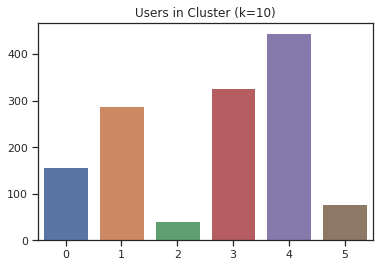

In [ ]:
sns.barplot(x=cluster, y=counts).set_title('Users in Cluster (k=10)')

In [ ]:
import pickle
from datetime import datetime

In [ ]:
with open(f'''kmean_{datetime.now().strftime("%m_%d_%Y")}.pkl''', 'wb') as fid:
  pickle.dump(km, fid)

NameError: ignored

In [ ]:
with open('kmean_05_26_2021.pkl', 'rb') as fid:
     km = pickle.load(fid)

In [ ]:
10000 // 4

2500

##### Calculation

In [ ]:
s1 = Scores(km)

In [ ]:
s1.score(method='standard', n=30, debug=False)

In [ ]:
with open(f'''scores_{datetime.now().strftime("%m_%d_%Y")}.pkl''', 'wb') as fid:
  pickle.dump(s1, fid)

AttributeError: ignored

In [ ]:
with open('scores_05_26_2021.pkl', 'rb') as fid:
     s1 = pickle.load(fid)

Text(0.5, 1.0, 'Histogram with Raw Scores')

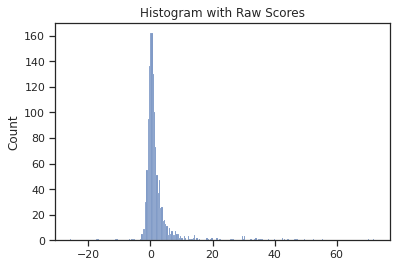

In [ ]:
sns.histplot(np.array(list(s1.userScores.values()))).set_title("Histogram with Raw Scores")

In [ ]:
from sklearn.preprocessing import minmax_scale, normalize, scale

Text(0.5, 1.0, 'Historgram with Scaled Scores')

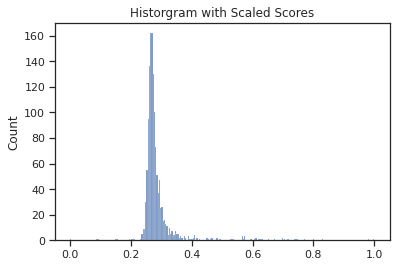

In [ ]:
# scale data between 0 and 1

scaledValues = minmax_scale(np.array(list(s1.userScores.values())))


sns.histplot(scaledValues).set_title("Historgram with Scaled Scores")

## Genbre CLustering

In [ ]:
movies = km.df.contentIdx.unique()
dbPull = Titles(connector)
dbPull.titles = movies
dbPull.getResponses(debug=False)

In [ ]:
%%time
dfs = []
for cont in dbPull.content:
  temp = cont.ratings.loc[:, ['user','rating']]
  temp['id'] = cont.id
  temp['title'] = cont.title
  temp['genres'] = temp.apply(lambda x: cont.genres, axis=1)
  dfs.append(temp)

gdf = pd.concat(dfs)

CPU times: user 1.49 s, sys: 15 ms, total: 1.51 s
Wall time: 1.5 s


In [ ]:
gdf.head()

user  rating   id              title   genres
1686  192     7.6  292  Bohemian Rhapsody  [Drama]
635   642     3.5  292  Bohemian Rhapsody  [Drama]
750   771     8.5  292  Bohemian Rhapsody  [Drama]
1568  929    10.0  292  Bohemian Rhapsody  [Drama]
4320  936     9.9  292  Bohemian Rhapsody  [Drama]

In [ ]:
genres = list(set(itertools.chain.from_iterable(gdf.genres)))
{}

NameError: ignored

In [ ]:
gdf[gdf.user == np.random.choice(gdf.user.unique())]

NameError: ignored

In [ ]:
from collections import Counter

In [ ]:
%%time
def getCaScores(user):
  contentList = []
  for hash in s1.users[user].scenes:
    contentList.append(km.df[km.df.hash == hash].iloc[0].contentIdx)


  caScores = {i:0 for i in set(contentList)}
  caCounts = Counter(contentList)

  for idx, content in enumerate(contentList):
    caScores[content] += s1.users[user].scores[idx]

  for ith in caScores:
    caScores[ith] = caScores[ith] / caCounts[ith]
  
  return list(caScores.values())

def getAllSCacores():
  caScores = {}
  for ithUser in s1.users:
    caScores[ithUser] = getCaScores(ithUser)
  
  return caScores



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


In [ ]:
caScores = getAllSCacores()
caScores

NameError: ignored

### Payment Modeling

In [ ]:

db = DB(connector['host'], connector['user'],connector['password'])


In [ ]:
counts = pd.DataFrame(db.run(f'''SELECT user_id, COUNT(user_id) 
           FROM results 
           WHERE code = 'EMOJI' 
           GROUP BY user_id ; 
           '''), columns=['user','responses'])

In [ ]:
mediaCounts = pd.DataFrame(db.run(f'''SELECT user_id, COUNT(DISTINCT media_id) 
           FROM results 
           WHERE code = 'EMOJI' 
           GROUP BY user_id'''), columns=['user','mediaCount'])

In [ ]:
earnings = pd.DataFrame(db.run(f'''SELECT user_id, ROUND(SUM(debit)/1000,2), ROUND(SUM(credit)/1000, 2), SUM(credit)
           FROM flow
           WHERE code = 'EMOJI'
           GROUP BY user_id
           ORDER BY SUM(credit) DESC
           '''), columns=['user','redeem','earned','flow']).merge(counts).merge(mediaCounts)
earnings.head()

user redeem earned   flow  responses  mediaCount
0    936   0.00  63.63  63625       1448         743
1   1182   0.00  58.53  58525       1645         717
2   7957   0.00  58.18  58175       3263         700
3   7611   0.00  57.60  57600       1560         694
4  19347   0.00  56.38  56375       3791         642

In [ ]:
user = 1182
print(s1.users[user].score, s1.users[user].cluster)
np.unique(km.users[user].emotions, return_counts=True)

0.7666666666666668 [-1, 1, 1, 1, 1]


(array(['excited', 'joy', 'omg', 'ouch', 'sad'], dtype=object),
 array([12,  3, 25,  3,  8]))

In [ ]:
print(earnings.shape)
nearnings = earnings[(earnings.responses > 10) & (earnings.responses < 50000) ]
nearnings['flow'] = nearnings['flow'].apply(pd.to_numeric)

(48777, 6)


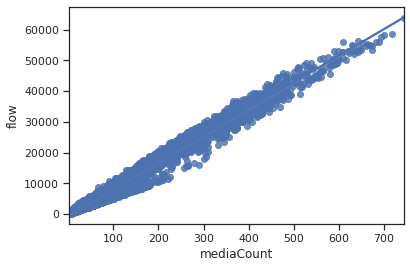

In [ ]:
sns.regplot( x=nearnings.mediaCount, y=nearnings.flow)

In [ ]:
from sklearn import linear_model


In [ ]:
regr = linear_model.LinearRegression()
_x = nearnings.mediaCount.to_numpy().reshape(-1, 1)
_y =  nearnings.flow.to_numpy().reshape(-1, 1)

NameError: ignored

In [ ]:
regr.fit(_x, _y)
print('Coefficients: \n', regr.coef_)


Coefficients: 
 [[86.29143469]]


### Quality Payments

In [ ]:
def getGamma():
  payouts = []
  for ithUser in s1.users:
    q = max(s1.users[ithUser].scores)
    x_u = km.df[km.df.user == ithUser].contentIdx.unique().shape[0]
    payouts.append(q * x_u)
  ss1 = sum(payouts)

  payouts = []
  for ithUser in s1.users:
    x = km.df[km.df.user == ithUser].contentIdx.unique().shape[0]
    payouts.append(regr.coef_[0][0] * x)
  ss2 = sum(payouts)
  
  return ss2/ss1

def gammaTwo():
  payouts = []
  caScores = caScoreGet()
  for ithUser in s1.users:
    q = max((0, caScores[ithUser]))
    x_u = km.df[km.df.user == ithUser].contentIdx.unique().shape[0]
    payouts.append(q * x_u)
  ss1 = sum(payouts)

  payouts = []
  for ithUser in s1.users:
    x = km.df[km.df.user == ithUser].contentIdx.unique().shape[0]
    payouts.append(regr.coef_[0][0] * x)
  ss2 = sum(payouts)
  

  return ss2/ss1

def caScoreGet():
  scorees = {}
  for user in s1.users:
    scorees[user] = np.mean(s1.users[user].scores)
  return scorees



In [ ]:
gamma = getGamma()
gamma

AttributeError: ignored

In [ ]:

def getPayment(user,gammma,beta, alpha, debug=False):
  q_u = s1.userScores[user]
  x_u  = km.df[km.df.user == user].contentIdx.unique().shape[0]
  y_u = regr.predict([[x_u]])[0][0]

  quality = (gamma * q_u * x_u)
  quantity = (x_u * beta)
  if debug:
    print("Score:", q_u)
    print("Quantity: ", quantity)
    print("Quality: ", quality)
  return (alpha * quantity) + ((1-alpha) * quality )

def getPayment2(user,gammma,beta, alpha, caScore, debug=False):
  q_u = caScore[user]
  x_u  = km.df[km.df.user == user].contentIdx.unique().shape[0]
  y_u = regr.predict([[x_u]])[0][0]

  quality = (gamma * q_u * x_u)
  quantity = (x_u * beta)
  if debug:
    print("Score:", q_u)
    print("Quantity: ", quantity)
    print("Quality: ", quality)
  return (alpha * quantity) + ((1-alpha) * quality )

In [ ]:
print(randomUser)
gamma = getGamma()
beta = regr.coef_[0][0]
alpha = .5
print("\n Total Flow Payment", round(getPayment(randomUser, gamma, beta, alpha, debug=True), 2))

26820
Score: 3.6666666666666674
Quantity:  3451.6573875370045
Quality:  32461.087101273144

 Total Flow Payment 17956.37


In [ ]:
randomUser = np.random.choice(list(s1.users.keys()))
print(randomUser)
gamma = gammaTwo()
caScores = caScoreGet()
beta = regr.coef_[0][0]
alpha = .5
print("\n Total Flow Payment", round(getPayment2(randomUser, gamma, beta, alpha, caScores, debug=True), 2))

39607
Score: -0.005177993527508091
Quantity:  1898.4115631453524
Quality:  -534.6074286472082

 Total Flow Payment 681.9


In [ ]:
def getAllUser(alpha):
  gamma = getGamma()
  beta = regr.coef_[0][0]
  payment = {}
  for ithUser in s1.users:
    payment[ithUser] = getPayment(ithUser, gamma, beta, alpha, debug=False)
  print(gamma)
  return pd.Series(payment)

def getAllUser2(alpha):
  gamma = gammaTwo()
  caScores = caScoreGet()
  beta = 50
  payment = {}
  for ithUser in s1.users:
    payment[ithUser] = getPayment2(ithUser, gamma, beta, alpha, caScores, debug=False)
  return pd.Series(payment)



In [ ]:
gammaTwo()

4693.0027117041855

In [ ]:
slist = []
for alpha in np.arange(0,1.1,0.2):
  slist.append(getAllUser2(alpha))

In [ ]:
payments = pd.DataFrame(slist).transpose()
payments.head()

0            1            2            3            4       5
22285  4907.643921  4306.115137  3704.586353  3103.057568  2501.528784  1900.0
2165  -1014.811697  -351.849358   311.112982   974.075321  1637.037661  2300.0
13689   995.891744  1226.713395  1457.535047  1688.356698  1919.178349  2150.0
9151   5344.808644  4685.846915  4026.885186  3367.923458  2708.961729  2050.0
18293  6692.116127  5933.692901  5175.269676  4416.846451  3658.423225  2900.0

In [ ]:
payments.sum()

0    1.987690e+06
1    1.884422e+06
2    1.781154e+06
3    1.677886e+06
4    1.574618e+06
5    1.471350e+06
dtype: float64

In [ ]:
payments.sort_values(by=0, ascending=False)

0             1  ...            4       5
26456  23442.980682  19104.384546  ...  6088.596136  1750.0
26548  17689.010221  14801.208177  ...  6137.802044  3250.0
26467  15660.036848  12908.029479  ...  4652.007370  1900.0
28253  14546.162543  12166.930035  ...  5029.232509  2650.0
1917   13542.664968  11134.131974  ...  3908.532994  1500.0
...             ...           ...  ...          ...     ...
27083  -5172.395462  -3887.916369  ...   -34.479092  1250.0
37810  -5531.659678  -4235.327742  ...  -346.331936   950.0
7803   -5587.801895  -4280.241516  ...  -357.560379   950.0
10154  -7020.732057  -5396.585645  ...  -524.146411  1100.0
19754  -8051.432777  -6171.146222  ...  -530.286555  1350.0

[1338 rows x 6 columns]

Alpha Level Histograms

In [ ]:
nIters = len(list(payments.columns))
n_cols = 3
n_rows = 2
_, axes = plt.subplots(nrows=n_rows,ncols=n_cols ,figsize=((20,15)))

for i, col in enumerate(payments.columns):
  sns.histplot(payments.loc[:,col], ax=axes[i//n_cols,i%n_cols] ).set_title(f"Alpha = {col * 0.2}")

NameError: ignored

In [ ]:
payvsaplha = payments.reset_index().rename(columns={'index':'user', 0:'0.0',1:'0.2',2:'0.4',3:'0.6',4:'0.8',5:'1'}).merge(earnings)
payvsaplha['realFlow'] = payvsaplha.apply(lambda x: km.df[km.df.user == x.user].contentIdx.unique().shape[0] * 50, axis=1)
payvsaplha.sort_values(by='flow', ascending=False).head()

NameError: ignored

In [ ]:
nIters = len(list(payments.columns))
n_cols = 3
n_rows = 2
_, axes = plt.subplots(nrows=n_rows,ncols=n_cols ,figsize=((20,15)))


for i, col in enumerate(['0.0','0.2',	'0.4',	'0.6',	'0.8',	'1']):
  sns.scatterplot(x=payvsaplha['realFlow'], y=payvsaplha[col], ax=axes[i//n_cols,i%n_cols] ).set_title(f'Alphae = {col}')

NameError: ignored

###### CA score

In [ ]:
ll = {ithuser:np.mean(s1.users[ithuser].scores) for ithuser in s1.users}

In [ ]:
caScores = caScoreGet()

In [ ]:
ca = pd.Series(caScores)
ca.head()

22285    0.027519
2165    -0.004701
13689    0.004935
9151     0.027778
18293    0.024586
dtype: float64

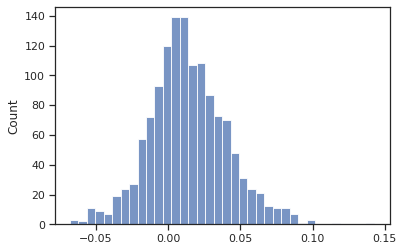

In [ ]:
sns.histplot(caScores)

In [ ]:
bottomCut = list(ca.quantile([.1, .9]))[0]
topCut = list(ca.quantile([.1, .9]))[1]
bottomUsers = np.array(list(ca[ca < bottomCut].index))
topUsers = np.array(list(ca[ca > topCut].index))
print(f"""# Users Avg < {round(bottomCut, 4)}: {bottomUsers.shape[0]} """)
print(f"""# Users Avg > {round(topCut,4)}: {topUsers.shape[0]} """)

# Users Avg < -0.0177: 134 
# Users Avg > 0.0467: 134 


Do users with a lower average score respond less (Scenes)?


In [ ]:
bcount = [km.users[i].scenes.shape[0] for i in bottomUsers]
tcount = [km.users[i].scenes.shape[0] for i in topUsers]


print(f'''On average, bottom users repsonded to {round(np.mean(bcount),1)} scenes''')
print(f'''On average, top users repsonded to {round(np.mean(tcount),1)} scenes''')

On average, bottom users repsonded to 55.0 scenes
On average, top users repsonded to 139.4 scenes


Do users with a lower average score respond less (Content)?


In [ ]:
bcount = [km.df[km.df.user == i].contentIdx.unique().shape[0] for i in bottomUsers]
tcount = [km.df[km.df.user == i].contentIdx.unique().shape[0] for i in topUsers]

print(f'''On average, bottom users repsonded to {round(np.mean(bcount),1)} content''')
print(f'''On average, top users repsonded to {round(np.mean(tcount),1)} content''')

On average, bottom users repsonded to 18.3 content
On average, top users repsonded to 20.6 content


How does entropy differe between the two groups?

In [ ]:
botEntropy = [km.users[i].entropy for i in bottomUsers]
topEntropy = [km.users[i].entropy for i in topUsers]
normal =  [km.users[i].entropy for i in km.uniqueUsers]

print(f'''The avg entropy for all users is : {round(np.mean(normal),4)} with a STD of {round(np.std(normal), 4)}''')
print(f'''Users with lowest scores have an average entropy of {round(np.mean(botEntropy),4)} with a STD of {round(np.std(botEntropy),4)}''')
print(f'''Users with highest scores have an average entropy of {round(np.mean(topEntropy),4)} with a STD of {round(np.std(topEntropy),4)}''')

The avg entropy for all users is : 1.5874 with a STD of 0.5744
Users with lowest scores have an average entropy of 1.4298 with a STD of 0.5995
Users with highest scores have an average entropy of 1.6095 with a STD of 0.507


How do low scores respond compared to their clusters?

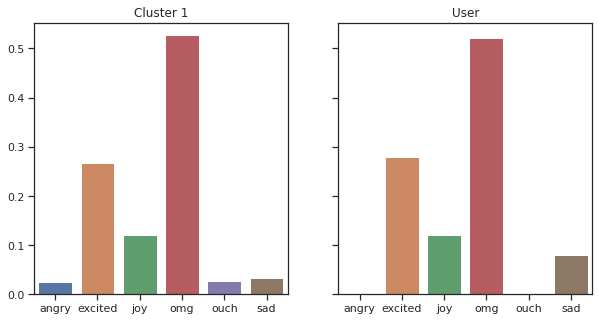

In [ ]:
sceneData = []
randomUser = km.users[np.random.choice(bottomUsers)]
clust = randomUser.getCluster()

for ithU in km.clusters[clust].users:
  __u = km.users[ithU]
  sceneData.append(__u.emotions)


v1,c1 = np.unique(np.hstack(sceneData), return_counts=True)
v2, c2 = np.unique(randomUser.emotions, return_counts=True)

c1norm = c1 / c1.sum()
c2norm = c2/c2.sum()

_, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
axes[0].set_title(f"""Cluster {clust}""")
axes[1].set_title("User")
sns.barplot(y=c1norm, x=v1, order=v1 ,ax=axes[0]) 
sns.barplot(y=c2norm, x=v2, order=v1 , ax=axes[1]) 

**How do high scorers respond compared to their clusters?**

They appear to respond similarly to their cluster as other users -- even low scorers.

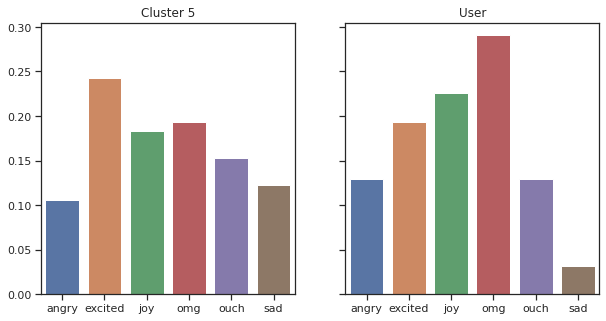

In [ ]:
sceneData = []
randomUser = km.users[np.random.choice(topUsers)]
clust = randomUser.getCluster()

for ithU in km.clusters[clust].users:
  __u = km.users[ithU]
  sceneData.append(__u.emotions)


v1,c1 = np.unique(np.hstack(sceneData), return_counts=True)
v2, c2 = np.unique(randomUser.emotions, return_counts=True)

c1norm = c1 / c1.sum()
c2norm = c2/c2.sum()

_, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
axes[0].set_title(f"""Cluster {clust}""")
axes[1].set_title("User")
sns.barplot(y=c1norm, x=v1, order=v1 ,ax=axes[0]) 
sns.barplot(y=c2norm, x=v2, order=v1 , ax=axes[1]) 

## Demographic Analysis

In [ ]:
topUsers

NameError: ignored

In [ ]:
bottomUsers

array([ 25755,  21203,  26764,  21276,   2146,  27434,  19347,  21204,
        26426,  27531,  10154,   2059,  21484,  19754,  17320,  12200,
        26386,  22265,   2642,   1701,  21236,  26519,  22031,  26474,
        12129,  26716,  26778,  26963,  26943,  27083,   1196,  27243,
        27286,  26087,  17919,  26037,  26735,  27747,  27872,  27285,
        25966,  27403,  27890,  16662,  26427,  21441,  26818,   7195,
        31841,  33766,  30769,  30747,  30234,  33689,  32849,  32955,
        36423,  36257,  36657,  36863,  36549,  36954,  36798,  36391,
        30094,  33443,  31705,  20435,  33289,  38251,  40050,  39926,
        40872,  31447,  37142,  37106,  35194,  37478,  37797,  37893,
         1479,  38194,  25905,  39652,  39688,  40166,  40182,  40189,
        40342,  40481,  40610,  40656,  39035,  40014,  36189,  40649,
        40653,  37023,  37736,   7803,  39300,  40006,  40363,  40624,
        40657,  41166,  40591,  42329,  42304,  43341,  43501,  43731,
      

In [ ]:
usersDf = db.run(f"""SELECT n.user_id, n.fname, n.lname, n.email, n.sex, n.ethnicity, n.income, n.parent, n.birthdate,a.postal_code, a.city, a.state,n.date_added 
                   FROM users n
                   INNER JOIN user_addresses a ON n.user_id = a.user_id
                   WHERE n.income IS NOT NULL
                   ;""")
usersDf = pd.DataFrame(usersDf, columns=['user','first','last','email','sex','ethnicity','income','parent','dob','zip','city','state','date'])

In [ ]:
usersDf['age'] = usersDf.apply(lambda x:  datetime.now().year - x.dob.year, axis=1)

In [ ]:
usersDf.head()

user       first   last  ... state                date age
0   572  Christine=   Wood  ...    MO 2017-04-03 00:56:14  54
1   596        Peng   Wang  ...    MS 2017-04-03 00:56:14  31
2   663        Peng   Wang  ...    MS 2017-04-03 00:23:15  31
3   713   Christine  Maier  ...    CA 2017-04-03 12:48:26  53
4   642       Kegan  Price  ...    OR 2017-04-03 00:56:14  20

[5 rows x 14 columns]

In [ ]:
eTop1 = usersDf[usersDf.user.isin(topUsers)].ethnicity.value_counts(normalize=True).sort_index(ascending=True)
print(eTop1)
eTop = eTop1.to_numpy()

A    0.039370
B    0.141732
L    0.212598
N    0.007874
O    0.062992
W    0.535433
Name: ethnicity, dtype: float64


In [ ]:
eBott1 = usersDf[usersDf.user.isin(bottomUsers)].ethnicity.value_counts(normalize=True).sort_index(ascending=True)
print(eBott1)
eBott = eBott1.to_numpy()

A    0.073394
B    0.165138
L    0.284404
N    0.009174
O    0.018349
W    0.449541
Name: ethnicity, dtype: float64


In [ ]:
exp1 = usersDf.ethnicity.value_counts(normalize=True).sort_index(ascending=True)
print(exp1)
exp = exp1.to_numpy()

A    0.090003
B    0.290859
L    0.152685
N    0.019282
O    0.064545
W    0.382627
Name: ethnicity, dtype: float64


In [ ]:
from scipy.stats import chisquare

In [ ]:
chisquare(f_obs=eTop, f_exp=exp)

Power_divergenceResult(statistic=0.19626507878232818, pvalue=0.9991535331116543)

In [ ]:
chisquare(f_obs=eBott, f_exp=exp)

Power_divergenceResult(statistic=0.2211027845486033, pvalue=0.9988697846672503)

Text(0.5, 1.0, 'High Scoring Demographics VS All Users')

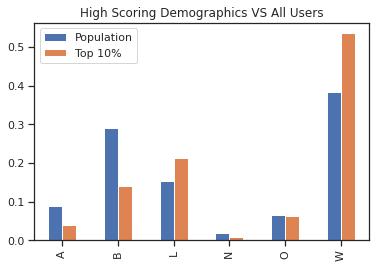

In [ ]:
fig, ax = plt.subplots()
pd.DataFrame([exp1, eTop1]).T.plot(kind='bar',  ax=ax)
ax.legend(["Population", "Top 10%"]);
ax.set_title("High Scoring Demographics VS All Users")

Text(0.5, 1.0, 'Low Scoring Demographics VS All Users')

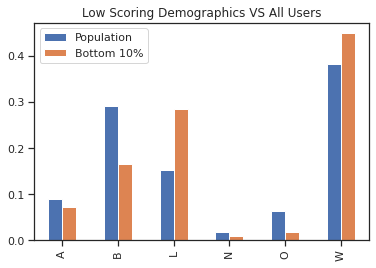

In [ ]:
fig, ax = plt.subplots()
pd.DataFrame([exp1, eBott1]).T.plot(kind='bar',  ax=ax)
ax.legend(["Population", "Bottom 10%"]);
ax.set_title("Low Scoring Demographics VS All Users")

In [ ]:
eTop1 = usersDf[usersDf.user.isin(topUsers)].income.value_counts(normalize=True).sort_index(ascending=True)
print(eTop1)
eTop = eTop1.to_numpy()

100    0.062500
150    0.062500
200    0.015625
25     0.484375
35     0.093750
50     0.117188
75     0.164062
Name: income, dtype: float64


In [ ]:
eBott1 = usersDf[usersDf.user.isin(bottomUsers)].income.value_counts(normalize=True).sort_index(ascending=True)
print(eBott1)
eBott = eBott1.to_numpy()

100    0.072072
150    0.054054
25     0.423423
35     0.171171
50     0.171171
75     0.108108
Name: income, dtype: float64


In [ ]:
exp1 = usersDf.income.value_counts(normalize=True).sort_index(ascending=True)
print(exp1)
exp = exp1.to_numpy()

100     0.060305
150     0.040842
200     0.012542
200+    0.016278
25      0.517497
35      0.152906
50      0.098385
75      0.101244
Name: income, dtype: float64


Text(0.5, 1.0, 'High Scorers -- Income VS All Users')

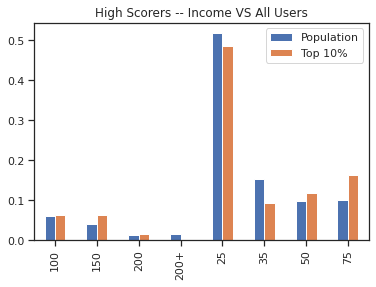

In [ ]:
fig, ax = plt.subplots()
pd.DataFrame([exp1, eTop1]).T.plot(kind='bar',  ax=ax)
ax.legend(["Population", "Top 10%"]);
ax.set_title("High Scorers -- Income VS All Users")

Text(0.5, 1.0, 'Low Scoring Demographics VS All Users')

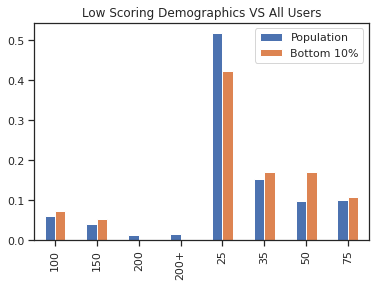

In [ ]:
fig, ax = plt.subplots()
pd.DataFrame([exp1, eBott1]).T.plot(kind='bar',  ax=ax)
ax.legend(["Population", "Bottom 10%"]);
ax.set_title("Low Scoring Demographics VS All Users")

In [ ]:
eTop1 = usersDf[usersDf.user.isin(topUsers)].sex.value_counts(normalize=True).sort_index(ascending=True)
print(eTop1)
eTop = eTop1.to_numpy()

F    0.539062
M    0.460938
Name: sex, dtype: float64


In [ ]:
eBott1 = usersDf[usersDf.user.isin(bottomUsers)].sex.value_counts(normalize=True).sort_index(ascending=True)
print(eBott1)
eBott = eBott1.to_numpy()

F    0.445455
M    0.527273
O    0.027273
Name: sex, dtype: float64


In [ ]:
exp1 = usersDf.sex.value_counts(normalize=True).sort_index(ascending=True)
print(exp1)
exp = exp1.to_numpy()

F    0.401421
M    0.586585
O    0.011994
Name: sex, dtype: float64


Text(0.5, 1.0, 'High Scorers -- Income VS All Users')

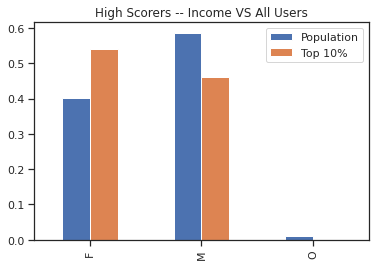

In [ ]:
fig, ax = plt.subplots()
pd.DataFrame([exp1, eTop1]).T.plot(kind='bar',  ax=ax)
ax.legend(["Population", "Top 10%"]);
ax.set_title("High Scorers -- Income VS All Users")

Text(0.5, 1.0, 'Low Scoring Demographics VS All Users')

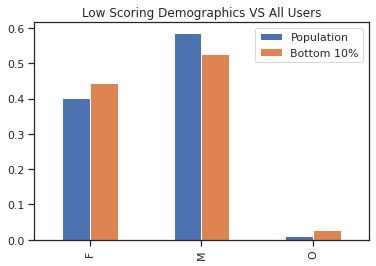

In [ ]:
fig, ax = plt.subplots()
pd.DataFrame([exp1, eBott1]).T.plot(kind='bar',  ax=ax)
ax.legend(["Population", "Bottom 10%"]);
ax.set_title("Low Scoring Demographics VS All Users")

Text(0.5, 1.0, 'Age of High Scoring Users')

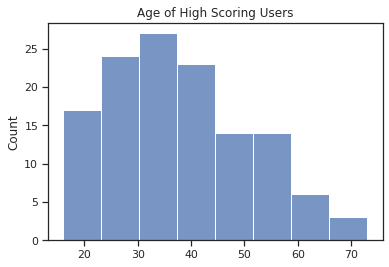

In [ ]:
eTop1 = usersDf[usersDf.user.isin(topUsers)].age
eTop = eTop1.to_numpy()
sns.histplot(eTop).set_title("Age of High Scoring Users")

Text(0.5, 1.0, 'Age of Low Scoring Users')

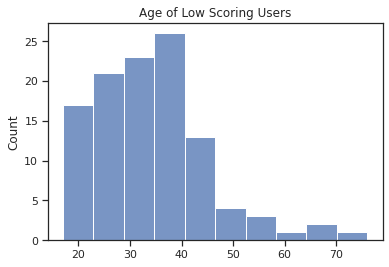

In [ ]:
eBott1 = usersDf[usersDf.user.isin(bottomUsers)].age
eBott = eBott1.to_numpy()
sns.histplot(eBott).set_title("Age of Low Scoring Users")

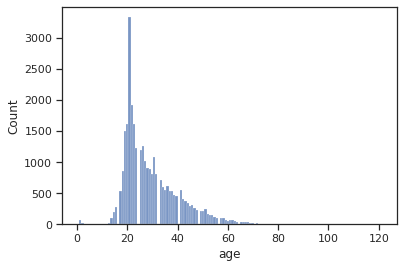

In [ ]:
sns.histplot(usersDf.age)

## Length on Platform

In [ ]:
interaction = db.run(f"SELECT user_id, MIN(date_added), MAX(date_added), COUNT(*) FROM flow GROUP BY user_id")

In [ ]:
inDf = pd.DataFrame(interaction, columns=['user','i1','i2', 'nInteractions'])
inDf.head()

user                  i1                  i2  nInteractions
0     0 2020-03-25 19:31:12 2020-03-25 19:31:12              1
1   192 2017-03-18 02:09:31 2021-05-04 18:05:23           1277
2   202 2017-06-07 18:35:02 2017-06-07 18:43:37              3
3   212 2018-03-12 12:08:56 2018-04-07 04:02:48             13
4   262 2017-04-24 21:56:05 2020-10-12 02:27:51             25

In [ ]:
inDf['delta']  = inDf.i2 - inDf.i1

In [ ]:
inDf['deltaday'] = inDf.apply(lambda x: x.delta.days, axis=1)

In [ ]:
active = inDf[inDf.deltaday > 2]

In [ ]:
print('All registered users ', inDf.shape[0])
# all users that have been on platform longer that 1 day
print('Users w/more than one day on platform ',active.shape[0])

All registered users  127867
Users w/more than one day on platform  18317


In [ ]:
print("Median days on platform: ", active.deltaday.median())

Median time on platform:  28.0


In [ ]:
print(f"Mean: {active.deltaday.describe()['mean']} and STD: {active.deltaday.describe()['std']}")

Mean: 171.1562482939346 and STD: 293.7108850807567


In [ ]:
print(f"Median of interactions for active users: {active.nInteractions.median()}")

Median of interactions for active users: 66.0


Top and Bottom Users time on platform

Text(0.5, 1.0, 'Top Users time on Platform')

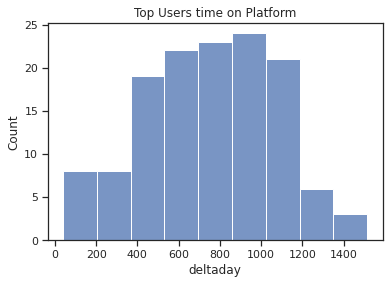

In [ ]:
sns.histplot(inDf[inDf.user.isin(topUsers)].deltaday).set_title("Top Users time on Platform")

Text(0.5, 1.0, 'Worst users time on platform')

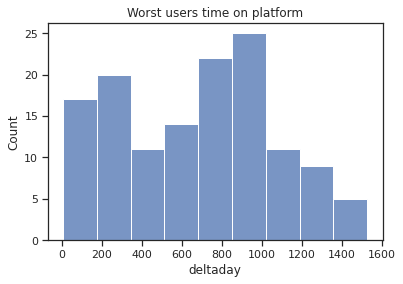

In [ ]:
sns.histplot(inDf[inDf.user.isin(bottomUsers)].deltaday).set_title("Worst users time on platform")

In [ ]:
oldestLongest =inDf.sort_values(by='nInteractions', ascending=False).iloc[:140]

In [ ]:
topBot = np.intersect1d(oldestLongest.user.to_numpy(), topUsers)
print(topBot.shape[0])

10


In [ ]:
oldBot = np.intersect1d(oldestLongest.user.to_numpy(), bottomUsers)
print(oldBot.shape[0])

8


Text(0.5, 1.0, 'User 26180 in cluster 1')

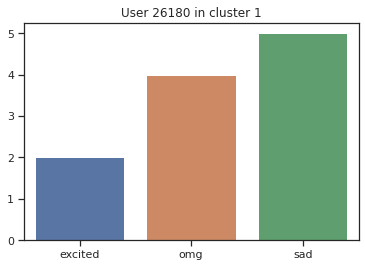

In [ ]:
rid = np.random.choice(topBot)

values, counts = np.unique(km.users[rid].emotions, return_counts=True) 
sns.barplot(x=values, y=counts).set_title(f'User {rid} in cluster {km.users[rid].getCluster()}')

Text(0.5, 1.0, 'User 21204 in cluster 1')

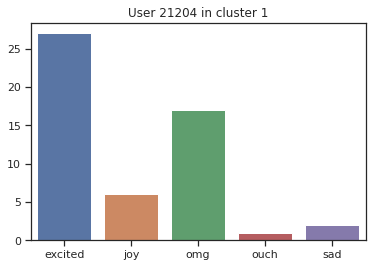

In [ ]:
rid = np.random.choice(oldBot)

values, counts = np.unique(km.users[rid].emotions, return_counts=True) 
sns.barplot(x=values, y=counts).set_title(f'User {rid} in cluster {km.users[rid].getCluster()}')

## Cluster for each user in top or bottom

Text(0.5, 1.0, 'Clusters of Top Users')

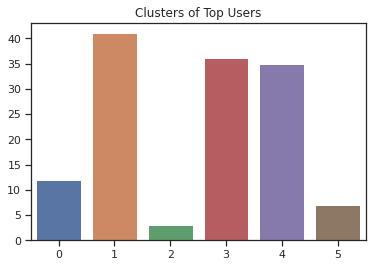

In [ ]:
values, counts = np.unique(np.array([km.users[i].getCluster() for i in topUsers]), return_counts=True)
sns.barplot(x=values, y=counts).set_title(f'Clusters of Top Users')

Text(0.5, 1.0, 'Clusters of Bottom Users')

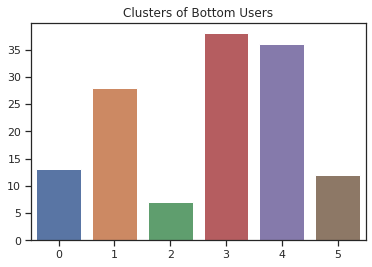

In [ ]:
values, counts = np.unique(np.array([km.users[i].getCluster() for i in bottomUsers]), return_counts=True)
sns.barplot(x=values, y=counts).set_title(f'Clusters of Bottom Users')

Text(0.5, 1.0, 'Clusters of All Users')

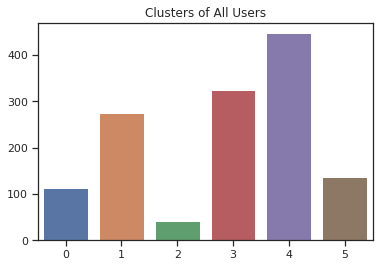

In [ ]:
values, counts = np.unique(np.array([km.users[i].getCluster() for i in km.uniqueUsers]), return_counts=True)
sns.barplot(x=values, y=counts).set_title(f'Clusters of All Users')

## User Activity

## Clusters

## Clust Viz

In [ ]:
flattened = {}
for user in km.uniqueUsers:
  flattened[user] = np.array([i.vector for i in km.users[user].struct.vectors]).flatten()

In [ ]:
vectors = pd.DataFrame(flattened).T

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(random_state = 42, n_components=2,verbose=1, perplexity=50, n_iter=300, early_exaggeration= 10).fit_transform(vectors)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1338 samples in 0.024s...
[t-SNE] Computed neighbors for 1338 samples in 0.592s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1338
[t-SNE] Computed conditional probabilities for sample 1338 / 1338
[t-SNE] Mean sigma: 1351.989922
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.326004
[t-SNE] KL divergence after 300 iterations: 0.814311


In [ ]:
vizDf = pd.DataFrame(tsne, columns=['x','y'], index=vectors.index).reset_index().rename(columns={'index':'user'})
vizDf['cluster'] = vizDf.apply(lambda x: km.users[x.user].getCluster(), axis=1)
vizDf.head()

user          x          y  cluster
0  22285  -3.285055  -3.897932        3
1   2165  -6.166111  -3.520263        3
2  13689 -10.395376 -14.020667        4
3   9151   0.714483  -9.212203        0
4  18293  -3.998756 -17.443760        1

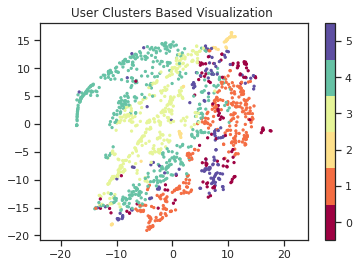

In [ ]:
plt.scatter(vizDf['x'], vizDf['y'], s= 5, c=vizDf['cluster'], cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(7)-0.5).set_ticks(np.arange(6))
plt.title('User Clusters Based Visualization ', fontsize=12);

In [ ]:
import plotly.express as px

In [ ]:
tsne = TSNE(random_state = 42, n_components=3,verbose=1, perplexity=50, n_iter=300, early_exaggeration= 10).fit_transform(vectors)
vizDf = pd.DataFrame(tsne, columns=['x','y','z'], index=vectors.index).reset_index().rename(columns={'index':'user'})
vizDf['cluster'] = vizDf.apply(lambda x: km.users[x.user].getCluster(), axis=1)
vizDf.head()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1338 samples in 0.025s...
[t-SNE] Computed neighbors for 1338 samples in 0.566s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1338
[t-SNE] Computed conditional probabilities for sample 1338 / 1338
[t-SNE] Mean sigma: 1351.989922
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.446701
[t-SNE] KL divergence after 300 iterations: 0.678152


user         x          y         z  cluster
0  22285  0.783579  -2.961518  0.417252        3
1   2165  1.921457  -4.013272 -1.794947        3
2  13689  0.490026 -11.485431 -0.383354        4
3   9151 -3.489578  -4.031446 -3.199859        0
4  18293 -4.230451 -10.781802 -0.258321        1

In [ ]:
fig = px.scatter_3d(
    vizDf, x='x', y='y', z='z',
    color='cluster', hover_data=['user','cluster'])
fig.update_traces(marker_size=8)
fig.show()

In [ ]:
tsne = TSNE(random_state = 42, n_components=2,verbose=1, perplexity=50, n_iter=300, early_exaggeration= 10).fit_transform(vectors)
vizDf = pd.DataFrame(tsne, columns=['x','y'], index=vectors.index).reset_index().rename(columns={'index':'user'})
vizDf['cluster'] = vizDf.apply(lambda x: km.users[x.user].getCluster(), axis=1)
vizDf.head()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1338 samples in 0.022s...
[t-SNE] Computed neighbors for 1338 samples in 0.575s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1338
[t-SNE] Computed conditional probabilities for sample 1338 / 1338
[t-SNE] Mean sigma: 1351.989922
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.326004
[t-SNE] KL divergence after 300 iterations: 0.814311


user          x          y  cluster
0  22285  -3.285055  -3.897932        3
1   2165  -6.166111  -3.520263        3
2  13689 -10.395376 -14.020667        4
3   9151   0.714483  -9.212203        0
4  18293  -3.998756 -17.443760        1

In [ ]:
fig = px.scatter(
    vizDf, x='x', y='y',
    color='cluster', hover_data=['user','cluster'])
fig.update_traces(marker_size=8)
fig.show()

In [ ]:
db.run(f"describe user_cluster")

[('user_cluster_id', 'int(11)', 'NO', 'PRI', None, 'auto_increment'),
 ('user_id', 'int(10) unsigned', 'YES', 'MUL', None, ''),
 ('x', 'float', 'YES', '', None, ''),
 ('y', 'float', 'YES', '', None, ''),
 ('date_added', 'datetime', 'YES', '', None, '')]

In [ ]:
INSERT INTO table_name (column1, column2, column3, ...)
VALUES (value1, value2, value3, ...);

'2021-06-18'

In [ ]:
for idx, row in vizDf.iterrows():
  if idx % 100 == 0: print(f'[Insert into DB]: Row {idx}')
  print(int(row.cluster), int(row.user))
  db.run(f'''INSERT INTO user_cluster (user_cluster_id, user_id, x, y)
             VALUES ({row.cluster}, {row.user}, {row.x}, {row.y});''')


[Insert into DB]: Row 0
3 22285
3 2165
4 13689
0 9151
1 18293
4 25682
5 2128
1 6641
2 6473
4 13530
4 11812
4 24221
5 15916
3 4083
4 26231
0 19258
4 21031
4 18277
1 6435
4 15542
1 14409
3 21086
5 18021
1 26378
1 2145
3 1946
4 25711
4 25755
3 771
1 2485
1 9822
1 17599
3 10341
3 20477
5 20160
3 20272
1 9645
4 11871
1 18283
0 19584
4 21137
4 26402
3 26247
5 23331
4 20617
3 26369
1 26391
3 2363
1 26331
4 11747
4 13342
0 21203
3 4805
4 14279
1 26468
3 26139
4 25362
5 9006
0 24660
1 26413
0 26002
3 1807
3 26119
4 26472
4 26516
1 14546
1 26548
3 11687
4 2369
5 26469
1 12268
2 21279
3 26568
3 26591
3 14307
5 3410
5 19128
4 26694
3 13490
4 26772
5 20764
3 26750
1 11683
4 2674
5 6655
3 26807
0 2299
1 26869
3 26759
1 26764
5 9913
4 26829
1 5524
1 26757
1 2058
0 3638
3 21276
4 21973
4 26948
1 26883
[Insert into DB]: Row 100
4 26947
3 26724
4 26824
4 2780
0 27016
4 27011
4 9229
4 16939
1 26960
4 27030
0 27031
1 26899
5 2146
1 27244
4 8692
3 4268
3 27118
4 2100
4 27082
5 27406
5 27434
5 2366
0 27019


In [ ]:
import plotly.express as px
import pandas as pd


data = db.run("select * from user_cluster")
df = pd.DataFrame(data, columns=['index','user','cluster','x','y','date'])

fig = px.scatter(
    df, x='x', y='y',
    color='cluster', hover_data=['user','cluster'])
fig.update_traces(marker_size=8)
fig.show()

In [ ]:
db.run("select * from user_cluster")

NameError: ignored